- Lembram daquela planilha complexa da aula passada que tranformamos em uma série temporal?

Eu salvei aquele DataFrame da série temporal em um .csv usando df.to_csv('_nomedoarquivo.csv_').

Vamos agora olhar para a série temporal!

Obs: Ja estou usando a série fake que esta disponível para vocês, estão não estranhem os dados!

- Trantano e visulizando a série temporal de maré

In [82]:
#Importanto as bibliotecas a serem usadas
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt


#caminho para os arquivo de dados de nivél do mar
path = '/home/luiza/Documentos/MiniCursoPython/Dados_Mare/'

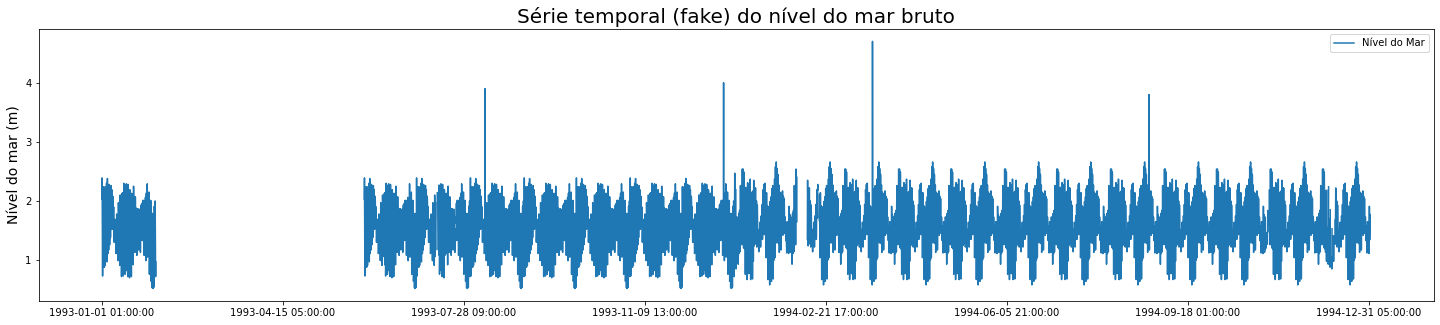

In [93]:
#Lendo o arquivo .csv da série temporal
df = pd.read_csv(path+'mare_exemplo.csv', header=0, index_col=0)
# df

# # visualizacao simples
df.plot(figsize=(25,5))
plt.title('Série temporal (fake) do nível do mar bruto', fontsize=20)
_= plt.ylabel('Nível do mar (m)', fontsize=14)

In [96]:
df.index

#Transformando o index em um datetime
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1993-01-01 01:00:00', '1993-01-01 02:00:00',
               '1993-01-01 03:00:00', '1993-01-01 04:00:00',
               '1993-01-01 05:00:00', '1993-01-01 06:00:00',
               '1993-01-01 07:00:00', '1993-01-01 08:00:00',
               '1993-01-01 09:00:00', '1993-01-01 10:00:00',
               ...
               '1994-12-31 15:00:00', '1994-12-31 16:00:00',
               '1994-12-31 17:00:00', '1994-12-31 18:00:00',
               '1994-12-31 19:00:00', '1994-12-31 20:00:00',
               '1994-12-31 21:00:00', '1994-12-31 22:00:00',
               '1994-12-31 23:00:00', '1995-01-01 00:00:00'],
              dtype='datetime64[ns]', length=17520, freq=None)

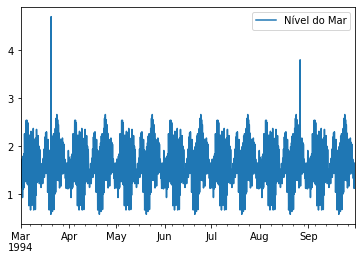

In [101]:
#Slice temporal
_= df['1994-03': '1994-09'].plot()

In [111]:
#Slice temporal para selecionar um período (1994)
df1994 = df['1994-03': '1994-09'].copy(deep=True)
print(df1994.shape)

(5136, 1)


In [59]:
#Detecção de outlier por desvio padrão (controle de qualidade dos dados)
avg = df1994['Nível do Mar'].mean()
std = df1994['Nível do Mar'].std()

limite_inferior = avg - 3*std
limite_superior = avg + 3*std

limite_inferior, limite_superior

(0.3665734348033458, 2.8684148829536635)

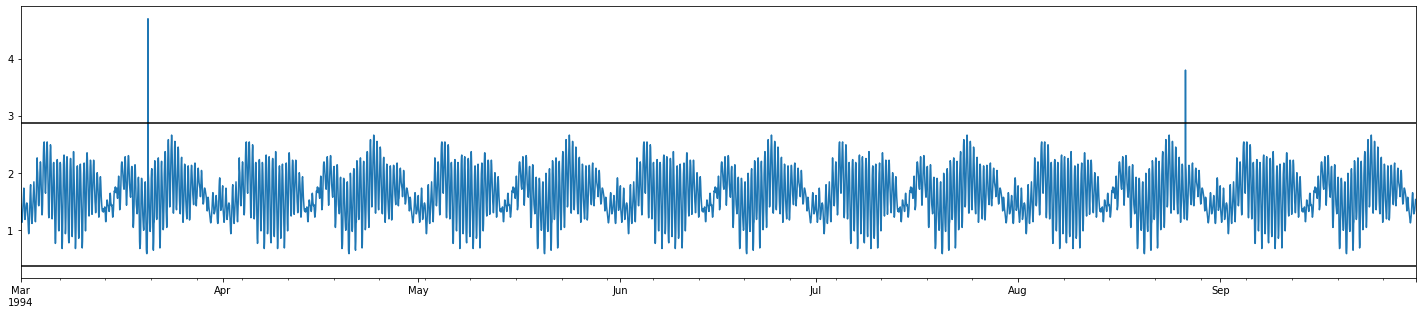

In [103]:
ax = df1994['Nível do Mar'].plot(figsize=(25,5))
_= ax.axhline(limite_inferior, color='k')
_= ax.axhline(limite_superior, color='k')

In [106]:
#Criando um filtro simples para excluir tudo que esta acima ou abaixo da média +- 3 desvio padrão
filtro_simples = ((df1994['Nível do Mar'] > limite_inferior ) & (df1994['Nível do Mar'] < limite_superior))
filtro_simples

1994-03-01 00:00:00    True
1994-03-01 01:00:00    True
1994-03-01 02:00:00    True
1994-03-01 03:00:00    True
1994-03-01 04:00:00    True
                       ... 
1994-09-30 19:00:00    True
1994-09-30 20:00:00    True
1994-09-30 21:00:00    True
1994-09-30 22:00:00    True
1994-09-30 23:00:00    True
Name: Nível do Mar, Length: 5134, dtype: bool

(5134, 2)


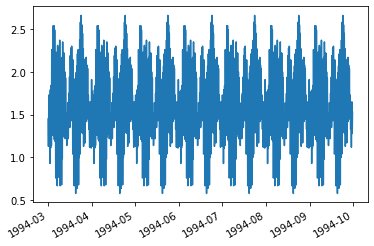

In [110]:
#Aplicando filtro na série temporal
df1994 = df1994[filtro_simples]
print(df1994.shape)
_= df1994['Nível do Mar'].plot()

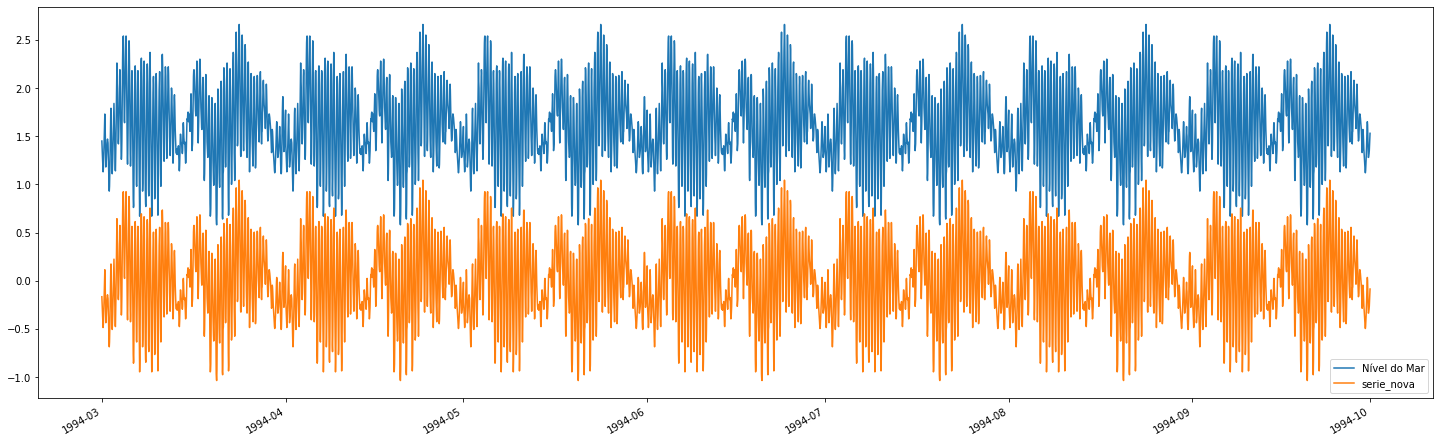

In [107]:
#Retirando a média da série para que ela varie em torno do zero
df1994['serie_nova'] = df1994 - df1994.mean()

#plotando as duas séries juntas
_ = df1994.plot(figsize=(25,8))

In [66]:
df1994.max()

Nível do Mar    2.660000
serie_nova      1.043531
dtype: float64

In [67]:
df1994.min()

Nível do Mar    0.580000
serie_nova     -1.036469
dtype: float64